8.313586378148452
-6.487562189054688
[-6.487562189054687, -5.19004975124375, -3.8925373134328125, -2.595024875621875, -1.2975124378109375, 0, 1.6627172756296904, 3.325434551259381, 4.988151826889071, 6.650869102518762, 8.313586378148452]
[-5.0, -4.0, -3.0, -2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0]


<function matplotlib.pyplot.show(close=None, block=None)>

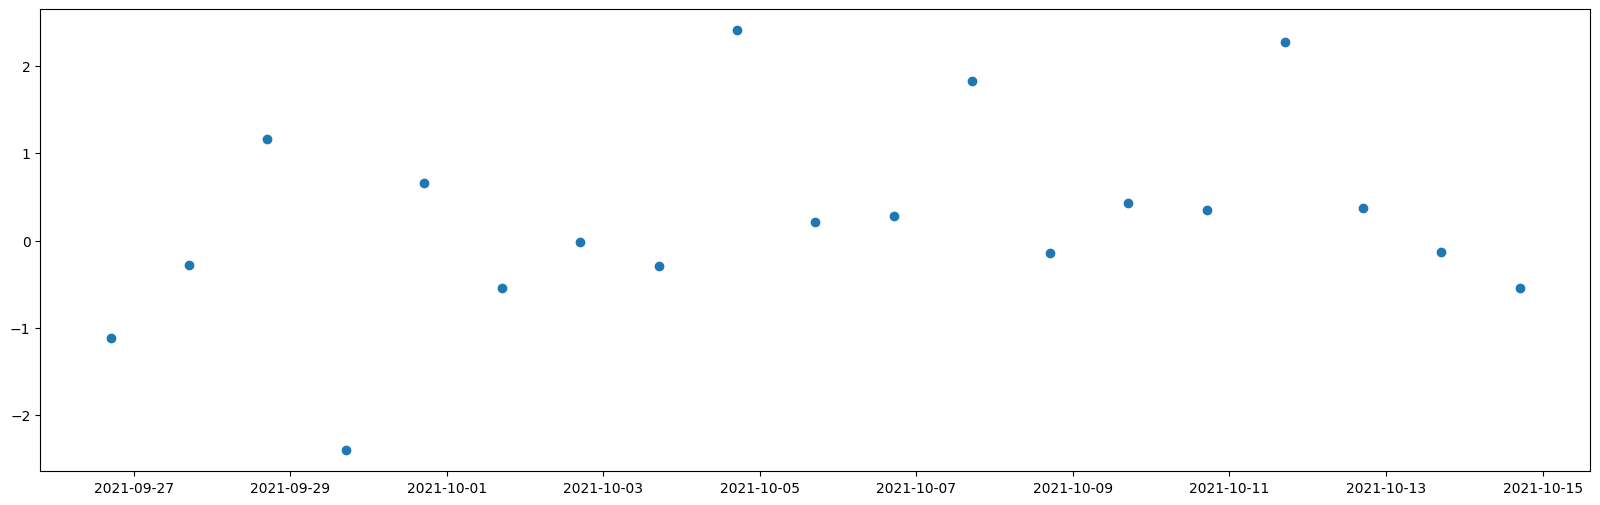

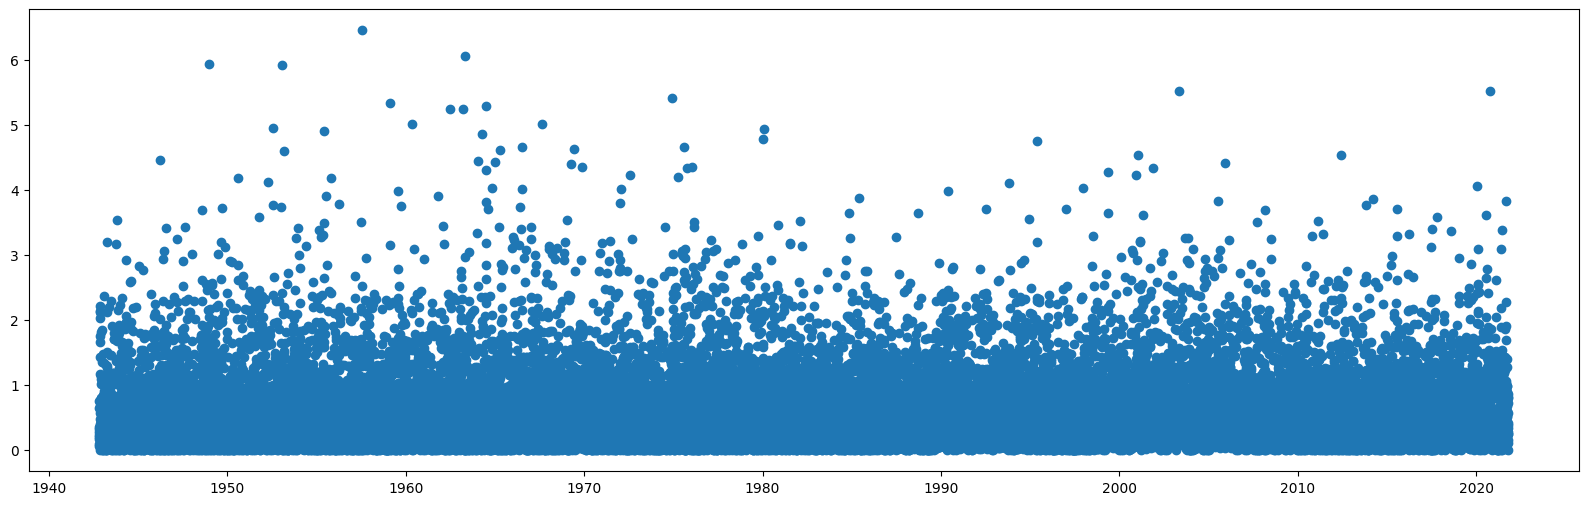

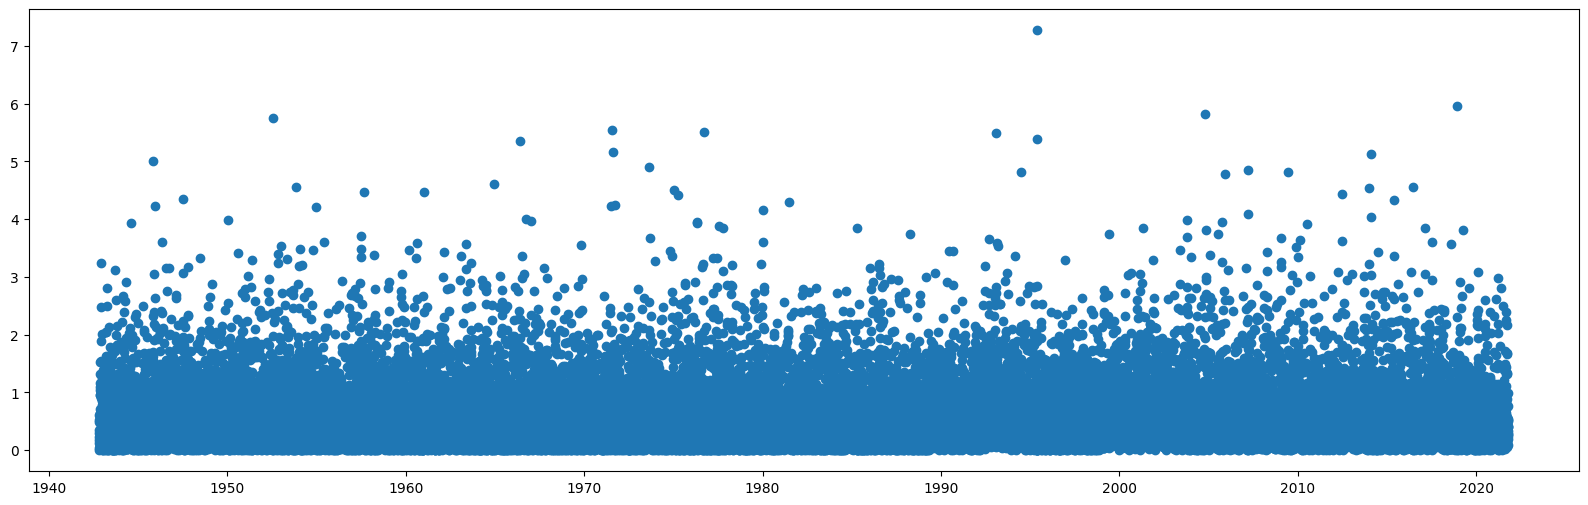

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# CONFIGS
ATR_range = 12
MARKET = 'EURUSD_4H'
NUM_OF_BUCKS = 10


df = pd.read_csv('./Data/{}.csv'.format(MARKET))

# from google.colab import files
# import io
# uploaded=files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['EURUSD.csv']))

df = df[df.columns[df.columns.isin(['date', 'open', 'high', 'low', 'close'])]]

# saving last date of market for later
last_date = df.iloc[-1, df.columns.get_loc('date')]
# print(last_date)

# removing nans in df
df = df.dropna()
df = df.dropna(axis=0)

# creating appropriate date range
dr = pd.date_range(end=last_date, periods=len(df))

df = df.drop(columns = 'date')
df = df.iloc[::-1]
df = df.reset_index()
df = df.drop(columns = 'index')
df['date'] = dr

df.head()

df[df.select_dtypes(include=['number']).columns] *= 100

# Calculate features
true_range = abs(df['open'] - df['close'])
atr = true_range.rolling(ATR_range).mean()

upper_shadow = df['high'] - np.where(df['open'] > df['close'], df['open'], df['close']) 
lower_shadow = np.where(df['open'] < df['close'], df['open'], df['close']) - df['low'] 
body = df['close'] - df['open']

# Normalizing features by ATR
upperatr = upper_shadow / atr
loweratr = lower_shadow / atr
bodyatr = body / atr

# Bucketization
positive_bucket_length = bodyatr.max() / (NUM_OF_BUCKS/2)
negative_bucket_length = (abs(bodyatr.min())) / (NUM_OF_BUCKS/2)

print(bodyatr.max())
print(bodyatr.min())
positive_bin = []
negative_bin = []

for i in range(int(NUM_OF_BUCKS/2)):
  z = (i+1) * positive_bucket_length
  y = (5 - i) * negative_bucket_length * -1
  positive_bin.append(z)
  negative_bin.append(y)

# positive_bin = positive_bin[1 : ]
bin = negative_bin + [0] + positive_bin
print(bin)

labels = []
for i in range(NUM_OF_BUCKS+1):
  labels.append(i - NUM_OF_BUCKS/2)
labels.remove(0)
print(labels)

df['bodyatr'] = bodyatr
df['bodyatr_buck'] = pd.cut(df['bodyatr'], bin, include_lowest=True, labels=labels)

df['upperatr'] = upperatr
df['upperatr_buck'] = pd.qcut(df['upperatr'], q=NUM_OF_BUCKS, labels=labels)

df['loweratr'] = loweratr
df['loweratr_buck'] = pd.qcut(df['loweratr'], q=NUM_OF_BUCKS, labels=labels)

# Creating final data to save
final_df = df
final_df.dropna(axis=0, inplace=True)

# Saving final df
final_df.to_csv('./Data/{}_Cleaned.csv'.format(MARKET))

df.head()

import datetime as dt
date_time = df['date'].values.tolist()
x = pd.to_datetime(date_time)
y = df['bodyatr'].values.tolist()
plt.figure(figsize=(20,6))
plt.scatter(x[-20: -1] ,y[-20: -1] )
plt.show

date_time = df['date'].values.tolist()
x = pd.to_datetime(date_time)
y = df['upperatr'].values.tolist()
plt.figure(figsize=(20,6))
plt.scatter(x ,y )
plt.show

date_time = df['date'].values.tolist()
x = pd.to_datetime(date_time)
y = df['loweratr'].values.tolist()
plt.figure(figsize=(20,6))
plt.scatter(x ,y )
plt.show